In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, f1_score
import itertools

In [2]:
file_path = r"C:\Users\jens.nilsen\OneDrive - Bouvet Norge AS\Documents\GitHub\trfkaipoc\data_2022-2025.csv"
df = pd.read_csv(file_path, sep=";")

In [3]:
df = df[df["EGS.VEDTAK.10670"].notna()]

In [4]:
df['Avslag_ind'] = df['EGS.VEDTAK.10670'].apply(lambda x: 1 if x == "Avslag" else 0)

In [5]:
andel_avslag=df['Avslag_ind'].sum()/df['Avslag_ind'].count()

In [6]:
andel_avslag

0.0405982905982906

In [7]:
antall_avslag=df['Avslag_ind'].sum()

In [8]:
antall_avslag

19

In [9]:
features = [
    'Avslag_ind',
    "ÅDT, total",
    "ÅDT, andel lange kjøretøy",
    "Fartsgrense",
    "Avkjørsel, holdningsklasse",
    "Funksjonsklasse",
    "Avkjørsler",
    "Trafikkulykker",
    "EGS.BRUKSOMRÅDE.1256", 
    "Kurvatur, horisontal", 
    "Kurvatur, stigning"
]

# Encode categorical features
df_encoded = pd.get_dummies(df[features])

In [10]:
df_encoded=df_encoded.dropna()

In [11]:
df_encoded

,Avslag_ind,"ÅDT, total","ÅDT, andel lange kjøretøy",Fartsgrense,Avkjørsler,Trafikkulykker,"Kurvatur, horisontal","Kurvatur, stigning","Avkjørsel, holdningsklasse_Lite streng","Avkjørsel, holdningsklasse_Meget streng",...,EGS.BRUKSOMRÅDE.1256_Dyrkamark/jordbruk,EGS.BRUKSOMRÅDE.1256_Forretning,EGS.BRUKSOMRÅDE.1256_Fritidsaktivitet,EGS.BRUKSOMRÅDE.1256_Gardsbruk,EGS.BRUKSOMRÅDE.1256_Hytte,EGS.BRUKSOMRÅDE.1256_Industri,EGS.BRUKSOMRÅDE.1256_Naust,EGS.BRUKSOMRÅDE.1256_Service,EGS.BRUKSOMRÅDE.1256_Skog/skogbruk,EGS.BRUKSOMRÅDE.1256_Skole/Barnehage
0,0,550.0,11.0,80.0,11,1,-405.0,-0.5,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,293.0,7.0,60.0,8,1,-415.0,-1.0,True,False,...,False,False,False,False,False,False,True,False,False,False
2,0,1500.0,13.0,80.0,2,4,182.0,0.7,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,15000.0,6.0,50.0,9,50,99999.0,-0.3,False,False,...,False,True,False,False,False,False,False,False,False,False
4,0,2980.0,12.0,80.0,5,8,99999.0,2.4,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1,1300.0,6.0,30.0,21,0,-1520.0,-0.5,True,False,...,False,False,False,False,False,False,False,False,False,False
464,0,500.0,10.0,60.0,12,2,-1119.0,0.2,False,False,...,False,False,False,True,False,False,False,False,False,False
465,0,400.0,13.0,60.0,12,0,-192.0,5.5,False,False,...,False,False,False,False,False,False,False,False,False,False
466,0,1600.0,15.0,80.0,8,6,-524.0,-3.0,False,False,...,False,False,False,False,False,False,False,False,True,False


In [12]:
y = df_encoded['Avslag_ind']        # target
X = df_encoded.drop(columns=['Avslag_ind'])  # all other columns

In [13]:
X

,"ÅDT, total","ÅDT, andel lange kjøretøy",Fartsgrense,Avkjørsler,Trafikkulykker,"Kurvatur, horisontal","Kurvatur, stigning","Avkjørsel, holdningsklasse_Lite streng","Avkjørsel, holdningsklasse_Meget streng","Avkjørsel, holdningsklasse_Mindre streng",...,EGS.BRUKSOMRÅDE.1256_Dyrkamark/jordbruk,EGS.BRUKSOMRÅDE.1256_Forretning,EGS.BRUKSOMRÅDE.1256_Fritidsaktivitet,EGS.BRUKSOMRÅDE.1256_Gardsbruk,EGS.BRUKSOMRÅDE.1256_Hytte,EGS.BRUKSOMRÅDE.1256_Industri,EGS.BRUKSOMRÅDE.1256_Naust,EGS.BRUKSOMRÅDE.1256_Service,EGS.BRUKSOMRÅDE.1256_Skog/skogbruk,EGS.BRUKSOMRÅDE.1256_Skole/Barnehage
0,550.0,11.0,80.0,11,1,-405.0,-0.5,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,293.0,7.0,60.0,8,1,-415.0,-1.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1500.0,13.0,80.0,2,4,182.0,0.7,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,15000.0,6.0,50.0,9,50,99999.0,-0.3,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2980.0,12.0,80.0,5,8,99999.0,2.4,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1300.0,6.0,30.0,21,0,-1520.0,-0.5,True,False,False,...,False,False,False,False,False,False,False,False,False,False
464,500.0,10.0,60.0,12,2,-1119.0,0.2,False,False,True,...,False,False,False,True,False,False,False,False,False,False
465,400.0,13.0,60.0,12,0,-192.0,5.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466,1600.0,15.0,80.0,8,6,-524.0,-3.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [14]:
import pandas as pd
import numpy as np
import itertools

# Anta at df er DataFrame-en din
df_num = X.copy()

# Konverter boolske til 0/1
for col in df_num.select_dtypes(include=["bool"]).columns:
    df_num[col] = df_num[col].astype(int)

# Fjern kolonner uten variasjon
valid_cols = [c for c in df_num.columns if df_num[c].nunique() > 1]

# === 2-veis interaksjoner ===
inter_2_dict = {
    f"{f1}*{f2}": df_num[f1] * df_num[f2]
    for f1, f2 in itertools.combinations(valid_cols, 2)
}
interactions_2way = pd.concat(inter_2_dict, axis=1)

# === 3-veis interaksjoner ===
inter_3_dict = {
    f"{f1}*{f2}*{f3}": df_num[f1] * df_num[f2] * df_num[f3]
    for f1, f2, f3 in itertools.combinations(valid_cols, 3)
}
interactions_3way = pd.concat(inter_3_dict, axis=1)

inter_4_dict = {
    f"{f1}*{f2}*{f3}*{f4}": df_num[f1] * df_num[f2] * df_num[f3]* df_num[f4]
    for f1, f2, f3, f4 in itertools.combinations(valid_cols, 4)
}
interactions_4way = pd.concat(inter_4_dict, axis=1)

# Slå alt sammen
#df_with_interactions = pd.concat([df_num, interactions_2way, interactions_3way], axis=1)
#df_with_interactions = pd.concat([df_num, interactions_2way], axis=1)
df_with_interactions = pd.concat([df_num, interactions_2way, interactions_3way, interactions_4way], axis=1)

In [15]:
#df_with_interactions = pd.concat([df_num, interactions_2way, interactions_3way], axis=1)
print("Opprinnelige kolonner:", len(df_num.columns))
print("Totalt etter interaksjoner:", len(df_with_interactions.columns))

Opprinnelige kolonner: 26
Totalt etter interaksjoner: 17901


In [16]:
X=df_with_interactions
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [17]:
model = RandomForestClassifier(
    n_estimators=10000,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
importances
# Select top 10 features
top_features = importances_sorted.index[:15]
X_top = X[top_features]

In [18]:
importances_sorted

ÅDT, total*Avkjørsler                                                                                                              0.004295
ÅDT, total                                                                                                                         0.003873
ÅDT, total*ÅDT, andel lange kjøretøy*Fartsgrense                                                                                   0.003839
Fartsgrense*Avkjørsler                                                                                                             0.003710
ÅDT, total*Fartsgrense*Avkjørsler                                                                                                  0.003691
                                                                                                                                     ...   
Fartsgrense*Trafikkulykker*EGS.BRUKSOMRÅDE.1256_Gardsbruk*EGS.BRUKSOMRÅDE.1256_Skole/Barnehage                                     0.000000
Fartsgrense*Trafikku

In [19]:
X=X_top

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [21]:
# Fit logistic regression
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [22]:
yps=model.predict_proba(X_test)

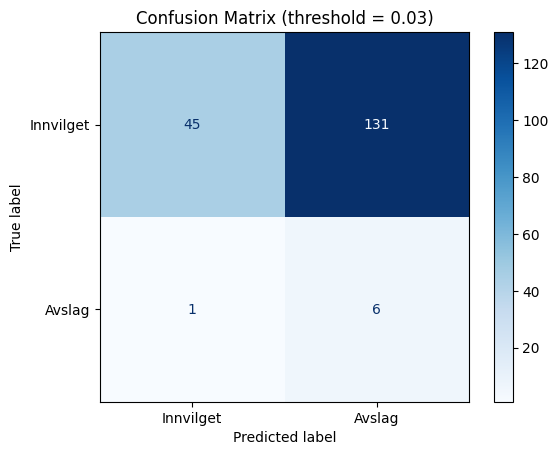

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicted probabilities for class "1"
y_prob = yps[:, 1]

# Adjustable threshold
threshold = 0.03  # 👈 change this value between 0 and 1

# Convert probabilities to class predictions
y_pred = (y_prob >= threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Innvilget", "Avslag"])

# Plot
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.show()

In [24]:
# Detailed metrics per class
print("Classification Report Logistic regression:")
print(classification_report(y_test, y_pred, digits=4))

Classification Report Logistic regression:
              precision    recall  f1-score   support

           0     0.9783    0.2557    0.4054       176
           1     0.0438    0.8571    0.0833         7

    accuracy                         0.2787       183
   macro avg     0.5110    0.5564    0.2444       183
weighted avg     0.9425    0.2787    0.3931       183



In [25]:
model = RandomForestClassifier(n_estimators=5000,n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5000, n_jobs=-1)

In [26]:
yps=model.predict_proba(X_test)

In [27]:
X_test

,"ÅDT, total*Avkjørsler","ÅDT, total","ÅDT, total*ÅDT, andel lange kjøretøy*Fartsgrense",Fartsgrense*Avkjørsler,"ÅDT, total*Fartsgrense*Avkjørsler","ÅDT, total*ÅDT, andel lange kjøretøy","ÅDT, total*ÅDT, andel lange kjøretøy*Kurvatur, stigning*Avkjørsel, holdningsklasse_Lite streng","ÅDT, total*ÅDT, andel lange kjøretøy*Kurvatur, stigning","ÅDT, total*ÅDT, andel lange kjøretøy*Avkjørsler","ÅDT, total*ÅDT, andel lange kjøretøy*Fartsgrense*Kurvatur, stigning","ÅDT, total*Fartsgrense","ÅDT, total*ÅDT, andel lange kjøretøy*Avkjørsler*Kurvatur, stigning","ÅDT, total*Fartsgrense*Avkjørsler*Kurvatur, stigning","Fartsgrense*Kurvatur, stigning","ÅDT, total*Kurvatur, stigning*Avkjørsel, holdningsklasse_Lite streng"
373,-0.347084,-0.342882,-0.385362,0.321862,-0.273344,-0.469932,-0.113838,0.073246,-0.398405,0.107136,-0.245812,0.048135,0.135191,0.272768,-0.092837
39,-0.436179,-0.465837,-0.716269,-0.378555,-0.500471,-0.658846,-0.424386,-0.142086,-0.517943,-0.107443,-0.478215,-0.144639,-0.069264,-0.636717,-0.518176
340,0.511517,0.257045,-0.071743,0.099002,0.387825,0.114784,1.715231,0.595054,0.298492,0.456786,0.079645,0.728447,0.668374,0.409593,2.099182
218,1.877447,0.726295,0.925669,1.054116,1.668142,1.311987,-0.113838,0.241778,2.495266,0.186379,0.441772,0.452118,0.301316,-0.012955,-0.092837
155,-0.364108,-0.431980,-0.488188,1.085953,-0.298876,-0.547071,-0.113838,0.175569,-0.389436,0.232450,-0.355825,0.194522,0.280063,0.852262,-0.092837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,-0.484415,-0.544837,-0.601297,1.340650,-0.479301,-0.631925,0.878500,0.306784,-0.454018,0.393147,-0.495175,0.375180,0.323685,2.172223,0.541430
193,-0.227913,-0.283483,-0.462482,-0.219369,-0.305258,-0.354223,-0.113838,0.253816,-0.245918,0.195593,-0.337489,0.255800,0.225736,0.369350,-0.092837
351,-0.009999,0.049150,-0.042952,-0.251206,0.010060,-0.011724,-0.113838,0.153419,-0.078720,0.147605,0.025555,0.116154,0.168331,0.103748,-0.092837
399,-0.532367,-0.493160,-0.340119,-0.696926,-0.551215,-0.435991,-0.113838,-0.054919,-0.492888,-0.049826,-0.431368,-0.053126,0.021567,-0.177950,-0.092837


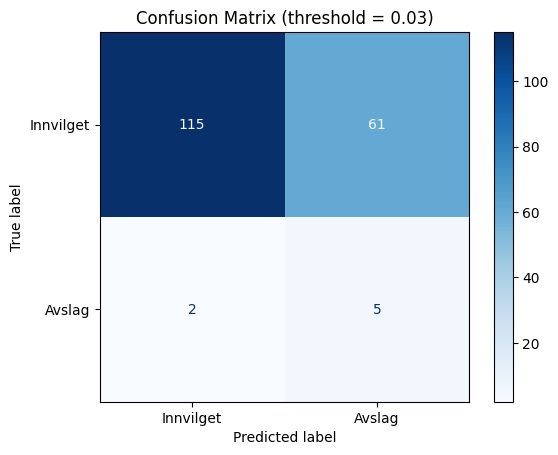

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicted probabilities for class "1"
y_prob = yps[:, 1]

# Adjustable threshold
threshold = 0.03 # 👈 change this value between 0 and 1

# Convert probabilities to class predictions
y_pred = (y_prob >= threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Innvilget", "Avslag"])

# Plot
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.show()

In [29]:
# Detailed metrics per class
print("Classification Report Random Forrest:")
print(classification_report(y_test, y_pred, digits=4))

Classification Report Random Forrest:
              precision    recall  f1-score   support

           0     0.9829    0.6534    0.7850       176
           1     0.0758    0.7143    0.1370         7

    accuracy                         0.6557       183
   macro avg     0.5293    0.6838    0.4610       183
weighted avg     0.9482    0.6557    0.7602       183



In [30]:
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values(ascending=False)

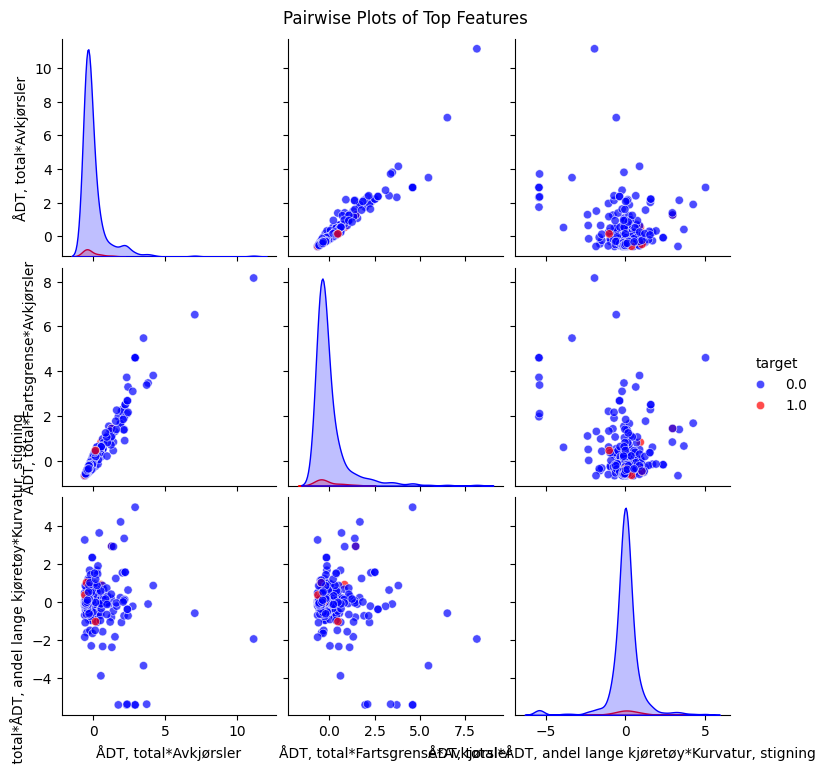

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 4 features
top_features = importances_sorted.index[:3]

# Subset data
X_top = X[top_features].copy()
X_top['target'] = y  # add the target

# Pairwise scatter plots
sns.pairplot(
    X_top,
    vars=top_features,
    hue='target',            # color by target
    palette={0: "blue", 1: "red"}, 
    plot_kws={'alpha': 0.7}
)
plt.suptitle("Pairwise Plots of Top Features", y=1.02)
plt.show()